In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Performance of the base model and the first model you chose to run

In [2]:
 ['arousal', 'valence', 'interest', 'despair', 'joy']

['arousal', 'valence', 'interest', 'despair', 'joy']

In [3]:
itamar = pd.read_csv("Y:\Data Science Readings\Applied Project Semester B\Results Chapter\LSTM_256_128_50eps_droplowvarL2-sr-norm.csv")

In [4]:
itamar

,Unnamed: 0,rmse_by_std_mean,rmse_mean,corr_mean,train_rmse_mean,train_corr_mean,y_val_mean_mean,y_val_std_mean,train_samples_mean,val_samples_mean
0,irritation,1.18,2.02,-0.01,1.88,0.27,2.77,1.72,3788.8,947.2
1,nostalgia,1.17,2.25,0.07,2.12,0.36,2.76,1.92,4300.8,1075.2
2,pride,1.21,2.15,-0.03,2.09,0.14,2.04,1.77,2816.0,704.0
3,relief,1.22,2.03,0.02,2.00,0.13,1.98,1.67,2278.4,569.6
4,sadness,1.22,2.02,0.03,1.98,0.17,2.57,1.66,4403.2,1100.8
5,satisfaction,1.22,2.27,-0.05,2.17,0.20,2.31,1.86,3328.0,832.0
6,surprise,1.18,1.84,0.09,1.84,0.14,1.86,1.56,2329.6,582.4
7,sympathy,1.25,2.49,0.01,2.10,0.41,2.21,1.99,2150.4,537.6
8,triumph,1.16,1.99,0.02,1.96,0.12,1.87,1.72,1433.6,358.4
9,arousal,1.17,1.04,0.13,1.37,0.14,4.74,0.89,7475.2,1868.8


In [5]:
lasso = pd.read_excel(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\results_summary_lasso.xlsx")

In [6]:
itamar_df = itamar[itamar['Unnamed: 0'].isin( ['arousal', 'valence', 'interest', 'despair', 'joy'])]
lasso_df = lasso[lasso['emotion'].isin(['arousal', 'valence', 'interest', 'despair', 'joy'])]

In [7]:
itamar_df = itamar_df.rename(columns={"rmse_by_std_mean":"Normalized RMSE","Unnamed: 0":"emotion"})

In [8]:
itamar_df

,emotion,Normalized RMSE,rmse_mean,corr_mean,train_rmse_mean,train_corr_mean,y_val_mean_mean,y_val_std_mean,train_samples_mean,val_samples_mean
9,arousal,1.17,1.04,0.13,1.37,0.14,4.74,0.89,7475.2,1868.8
10,valence,1.15,1.37,0.06,1.51,0.14,3.64,1.19,7475.2,1868.8
19,despair,1.17,2.26,0.00,2.21,0.18,2.93,1.93,4838.4,1209.6
31,interest,1.23,1.63,0.02,1.82,0.07,4.11,1.32,4659.2,1164.8
32,joy,1.19,1.97,0.02,1.89,0.23,2.28,1.66,2534.4,633.6


In [9]:
lasso_df

,emotion,RMSE,Normalized RMSE,alpha
9,arousal,0.797416,0.921963,0.006216
10,valence,1.138920,0.954412,0.008255
19,despair,1.883566,0.931668,0.016410
31,interest,1.741588,0.876528,0.010294
32,joy,1.308402,0.930825,0.008255


In [10]:
itamar_df['Normalized RMSE']

9     1.17
10    1.15
19    1.17
31    1.23
32    1.19
Name: Normalized RMSE, dtype: float64

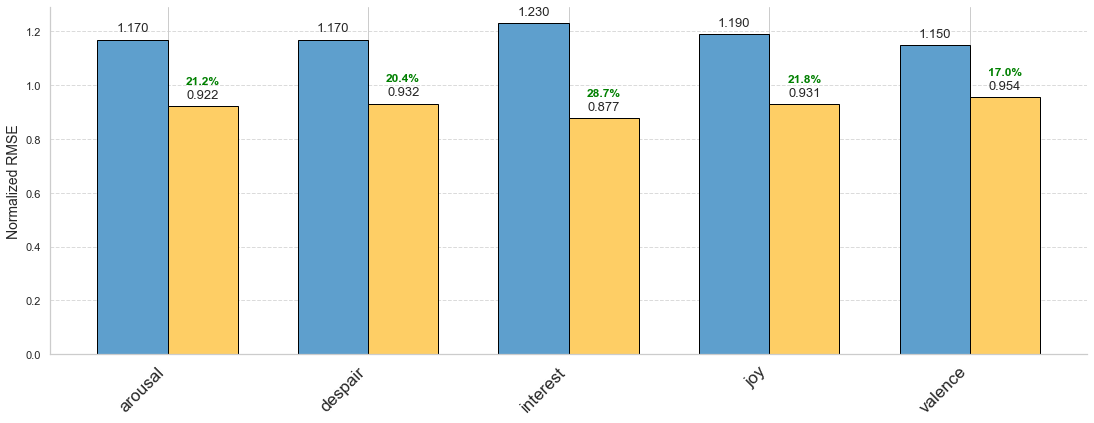

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_normalized_rmse_comparison(df1, df2, df1_label='Model 1', df2_label='Model 2'):
    merged_df = pd.merge(df1, df2, on='emotion', suffixes=('_df1', '_df2'))
    merged_df.sort_values('emotion', inplace=True)
    merged_df['Percentage Improvement'] = ((merged_df['Normalized RMSE_df1'] - merged_df['Normalized RMSE_df2']) / merged_df['Normalized RMSE_df1']) * 100
    sns.set(style="whitegrid")
    x = np.arange(len(merged_df['emotion']))  
    width = 0.35  
    fig, ax = plt.subplots(figsize=(18, 6))
    num_emotions = len(merged_df['emotion'])
    blue_palette = sns.color_palette("Blues_d", n_colors=num_emotions)
    gold_palette = sns.color_palette("YlOrBr", n_colors=num_emotions)
    rects1 = []
    rects2 = []
    for i in range(num_emotions):
        rect1 = ax.bar(x[i] - width/2, merged_df['Normalized RMSE_df1'].iloc[i], width,
                       label=df1_label if i == 0 else "", color=blue_palette[1], edgecolor='black')
        rects1.append(rect1[0]) 
        rect2 = ax.bar(x[i] + width/2, merged_df['Normalized RMSE_df2'].iloc[i], width,
                       label=df2_label if i == 0 else "", color=gold_palette[1], edgecolor='black')
        rects2.append(rect2[0])
    for x_pos, height, perc_impr in zip(x + width/2, merged_df['Normalized RMSE_df2'], merged_df['Percentage Improvement']):
        ax.annotate(f'{perc_impr:.1f}%', xy=(x_pos, height), xytext=(0, 20), textcoords='offset points',
                    ha='center', va='bottom', fontsize=12, color='green', fontweight='bold')
    ax.set_ylabel('Normalized RMSE', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(merged_df['emotion'], rotation=45, ha='right', fontsize=17)
    sns.despine(ax=ax)
    ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # Vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom', fontsize=13)
    autolabel(rects1)
    autolabel(rects2)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) 
    plt.show()
plot_normalized_rmse_comparison(itamar_df, lasso_df, df1_label="Itamar's LSTM Results", df2_label='Lasso Regression')


#comparison_df = compare_normalized_rmse(itamar_df, lasso_df)


In [12]:
itamar_df

,emotion,Normalized RMSE,rmse_mean,corr_mean,train_rmse_mean,train_corr_mean,y_val_mean_mean,y_val_std_mean,train_samples_mean,val_samples_mean
9,arousal,1.17,1.04,0.13,1.37,0.14,4.74,0.89,7475.2,1868.8
10,valence,1.15,1.37,0.06,1.51,0.14,3.64,1.19,7475.2,1868.8
19,despair,1.17,2.26,0.00,2.21,0.18,2.93,1.93,4838.4,1209.6
31,interest,1.23,1.63,0.02,1.82,0.07,4.11,1.32,4659.2,1164.8
32,joy,1.19,1.97,0.02,1.89,0.23,2.28,1.66,2534.4,633.6


### Description of the error analysis of your model, the conclusions from the error analysis and how they ledto choose the second model.

In [13]:
lasso_joy_predictions = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\First Lasso Results\joy_predictions.csv")
lasso_despair_predictions = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\First Lasso Results\despair_predictions.csv")
lasso_interest_predictions = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\First Lasso Results\interest_predictions.csv")
lasso_valence_predictions = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\First Lasso Results\valence_predictions.csv")
lasso_arousal_predictions = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\First Lasso Results\arousal_predictions.csv")

In [14]:
emotions_df_list = [lasso_joy_predictions,lasso_despair_predictions,lasso_interest_predictions,lasso_valence_predictions,lasso_arousal_predictions]
emotion_df_names = ['joy','despair','interest','valence','arousal']

In [15]:
import matplotlib.pyplot as plt

def pred_vs_actual_multi(dataframes, emotion_names):
    import matplotlib.pyplot as plt
    num_emotions = len(emotion_names)
    fig_rows = 1
    fig_cols = num_emotions
    fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(fig_cols * 5, 5))
    if num_emotions == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    for idx, (df, emotion) in enumerate(zip(dataframes, emotion_names)):
        ax = axes[idx]
        y_test = df['Real']
        y_pred = df['Predicted']
        ax.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
        ax.plot(
            [y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--',
            linewidth=2,
            label='Reference Line (y = x)',
        )
        ax.set_xlabel('Actual Values',size=30)
        ax.set_ylabel('Predicted Values',size=30)
        ax.set_title(f'{emotion}', size=30)
        ax.legend()
        ax.grid(True)
    if num_emotions < len(axes):
        for idx in range(num_emotions, len(axes)):
            fig.delaxes(axes[idx])
    plt.tight_layout()
    plt.show()


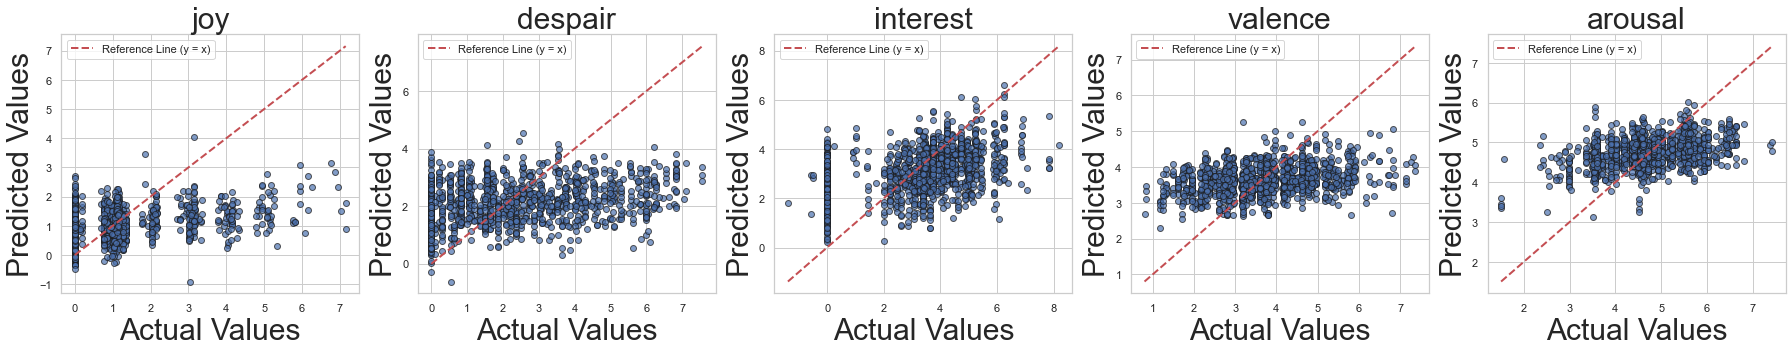

In [16]:
pred_vs_actual_multi(dataframes=emotions_df_list, emotion_names=emotion_df_names)

## Comparing with XGBoost


In [17]:
xgb_rmses = pd.read_excel(r"Y:\Data Science Readings\Applied Project Semester B\xgboost\xgboost_original_data\XGBoost_rmse_metrics.xlsx")

In [18]:
xgb_rmses = xgb_rmses.rename(columns={"Y":"emotion"})

In [19]:
lasso_df

,emotion,RMSE,Normalized RMSE,alpha
9,arousal,0.797416,0.921963,0.006216
10,valence,1.138920,0.954412,0.008255
19,despair,1.883566,0.931668,0.016410
31,interest,1.741588,0.876528,0.010294
32,joy,1.308402,0.930825,0.008255


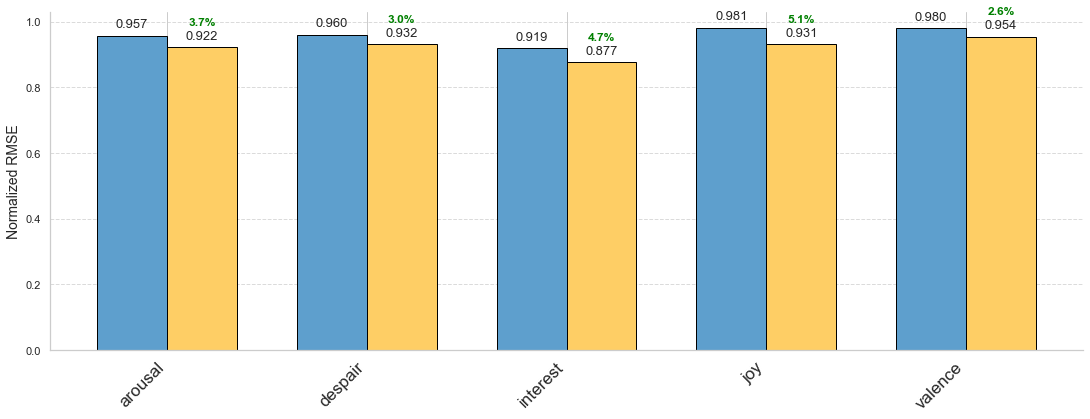

In [20]:
plot_normalized_rmse_comparison(xgb_rmses, lasso_df, df1_label="Itamar's LSTM Results", df2_label='Lasso Regression')


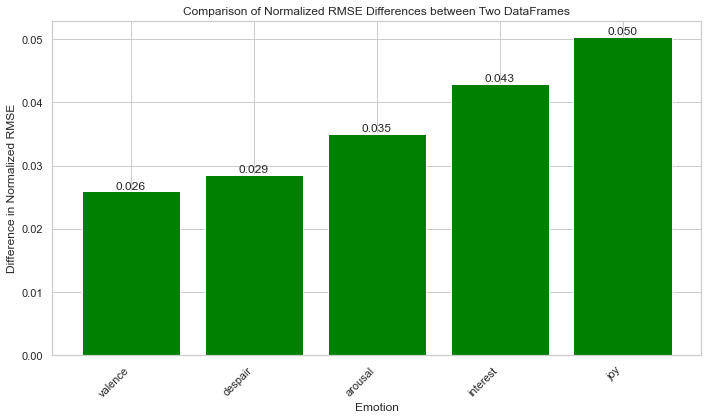

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rmse_differences(df1, df2):
    # Merging the two dataframes on the 'emotion' column
    merged_df = pd.merge(df1, df2, on='emotion', suffixes=('_df1', '_df2'))
    
    # Calculating the difference in Normalized RMSE
    merged_df['RMSE_difference'] = merged_df['Normalized RMSE_df1'] - merged_df['Normalized RMSE_df2']
    
    # Sorting values by the difference to make the plot more informative
    merged_df.sort_values(by='RMSE_difference', inplace=True)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(merged_df['emotion'], merged_df['RMSE_difference'], 
                   color=np.where(merged_df['RMSE_difference'] > 0, 'green', 'red'))
    
    # Adding labels and title
    plt.xlabel('Emotion')
    plt.ylabel('Difference in Normalized RMSE')
    plt.title('Comparison of Normalized RMSE Differences between Two DataFrames')
    
    # Add data labels to each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', 
                 ha='center', va='bottom' if yval > 0 else 'top')
    
    # Show plot
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
# df1 and df2 are your dataframes
plot_rmse_differences(xgb_rmses, lasso_df)


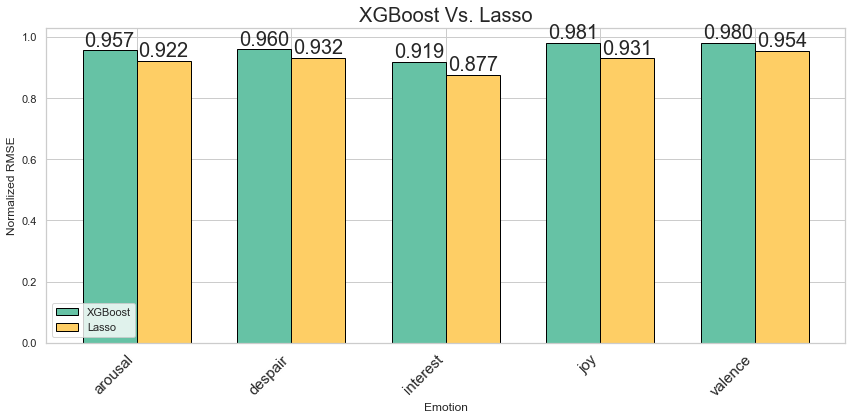

In [219]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rmse_side_by_side(df1, df2):
    # Merging the two dataframes on the 'emotion' column
    merged_df = pd.merge(df1, df2, on='emotion', suffixes=('_df1', '_df2'))
    
    # Setting up the figure size and bar width
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    emotions = merged_df['emotion']
    
    # Setting the positions of the bars on the x-axis
    index = np.arange(len(emotions))
    gold_palette = sns.color_palette("YlOrBr", n_colors=5)
    green_palette = sns.color_palette("Set2")

    # Creating the side by side bar plot
    bars1 = plt.bar(index, merged_df['Normalized RMSE_df1'], bar_width, label='XGBoost', color=green_palette[0],edgecolor='black')
    bars2 = plt.bar(index + bar_width, merged_df['Normalized RMSE_df2'], bar_width, label='Lasso', color=gold_palette[1],edgecolor="black")
    
    # Adding labels and title
    plt.xlabel('Emotion')
    plt.ylabel('Normalized RMSE')
    plt.title('XGBoost Vs. Lasso',size=20)
    plt.xticks(index + bar_width / 2, emotions, rotation=45, ha='right',size=15)
    
    # Adding a legend
    plt.legend()
    
    # Adding data labels on top of the bars for better visibility
    def add_labels(bars):
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom',size=20)
    
    add_labels(bars1)
    add_labels(bars2)
    
    # Adjust layout for better fit
    plt.tight_layout()
    
    # Show plot
    plt.show()

# Example usage
# df1 and df2 are your dataframes
plot_rmse_side_by_side(xgb_rmses, lasso_df)


In [23]:
xgboost_arousal_preds = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\xgboost\xgboost_original_data\predictions\arousal_predictions.csv")
xgboost_despair_preds = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\xgboost\xgboost_original_data\predictions\despair_predictions.csv")
xgboost_interest_preds = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\xgboost\xgboost_original_data\predictions\interest_predictions.csv")
xgboost_joy_preds = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\xgboost\xgboost_original_data\predictions\joy_predictions.csv")
xgboost_valence_preds = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\xgboost\xgboost_original_data\predictions\valence_predictions.csv")


In [24]:
xgboost_df_list = [xgboost_joy_preds,xgboost_despair_preds,xgboost_interest_preds,xgboost_valence_preds,xgboost_arousal_preds]
emotion_df_names = ['joy','despair','interest','valence','arousal']

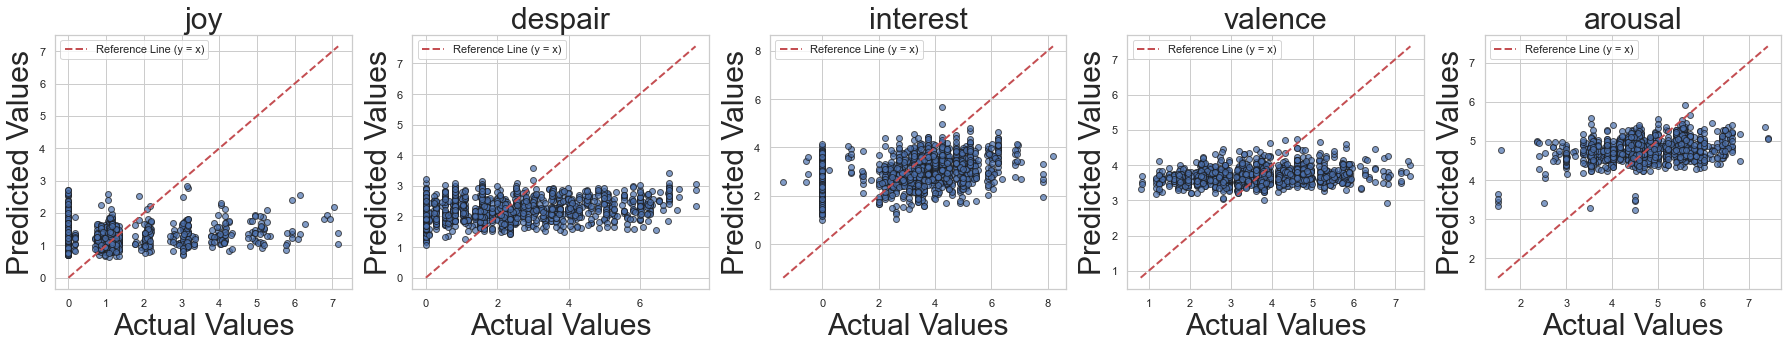

In [25]:
pred_vs_actual_multi(dataframes=xgboost_df_list, emotion_names=emotion_df_names)

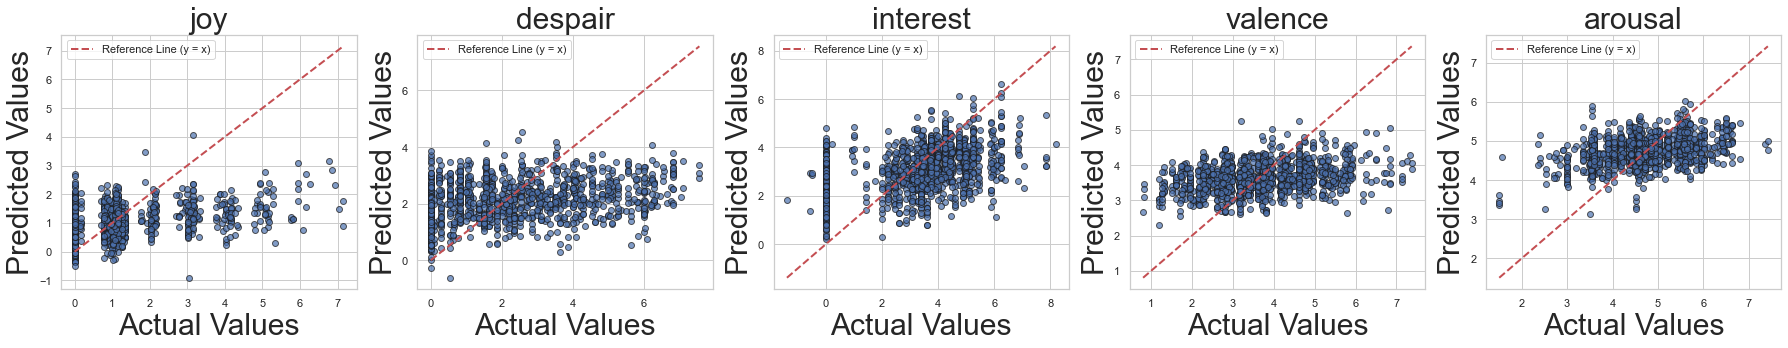

In [26]:
pred_vs_actual_multi(dataframes=emotions_df_list, emotion_names=emotion_df_names)

### investigating feature importances for lasso regression


In [27]:
lasso_feature_importance_joy = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\feature_importance\feature_importances\joy_feature_importances.csv")
lasso_feature_importance_despair = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\feature_importance\feature_importances\despair_feature_importances.csv")
lasso_feature_importance_interest = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\feature_importance\feature_importances\interest_feature_importances.csv")
lasso_feature_importance_valence = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\feature_importance\feature_importances\valence_feature_importances.csv")
lasso_feature_importance_arousal = pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\Results Chapter\feature_importance\feature_importances\arousal_feature_importances.csv")


In [33]:
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import joblib
import os
import warnings
import xgboost 
from sklearn.decomposition import PCA
import joblib
import numpy as np
import pandas as pd

df = pd.read_csv(r"Y:\\Data Science Readings\\Applied Project Semester B\\final_data_merged.csv")
X = df.iloc[:, 4:-53]
emotion = ['joy','despair','interest','valence','arousal']
y = df[emotion]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=207026618)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.9999) + 1
pca = PCA(n_components=n_components)
X_train_pca_reduced = pca.fit_transform(X_train_scaled)
X_test_pca_reduced = pca.transform(X_test_scaled)
pca_loadings = pca.components_.T
X_train_reduced = X_train_pca_reduced
X_test_reduced = X_test_pca_reduced

In [34]:
original_feature_names = ["X"+str(i) for i in range(1920)]

In [38]:
xgb_arousal = joblib.load("Y:\\Data Science Readings\\Applied Project Semester B\\xgboost\\xgboost_original_data\\joblib\\arousal_best_xgboost_model.joblib")
xgb_joy = joblib.load("Y:\\Data Science Readings\\Applied Project Semester B\\xgboost\\xgboost_original_data\\joblib\\joy_best_xgboost_model.joblib")
xgb_valence = joblib.load("Y:\\Data Science Readings\\Applied Project Semester B\\xgboost\\xgboost_original_data\\joblib\\valence_best_xgboost_model.joblib")
xgb_interest = joblib.load("Y:\\Data Science Readings\\Applied Project Semester B\\xgboost\\xgboost_original_data\\joblib\\interest_best_xgboost_model.joblib")
xgb_despair = joblib.load("Y:\\Data Science Readings\\Applied Project Semester B\\xgboost\\xgboost_original_data\\joblib\\despair_best_xgboost_model.joblib")

In [39]:
def xgboost_feature_importance(xgb_inputmodel):
    xgb_model = xgb_inputmodel
    xgb_importance = xgb_model.get_booster().get_score(importance_type='gain')
    n_components = pca.components_.shape[0]
    xgb_importance_ordered = np.zeros(n_components)
    for feature, importance in xgb_importance.items():
        pc_index = int(feature[1:])
        xgb_importance_ordered[pc_index] = importance
    pca_components = pca.components_
    original_feature_importance = np.abs(pca_components.T @ xgb_importance_ordered)
    original_features = ["X"+str(i) for i in range(1920)]
    importance_df = pd.DataFrame({
        'Feature': original_features,
        'Importance': original_feature_importance
    })
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    return importance_df

In [104]:
xgb_arousal_importance = xgboost_feature_importance(xgb_arousal)
xgb_joy_importance = xgboost_feature_importance(xgb_joy)
xgb_valence_importance = xgboost_feature_importance(xgb_valence)
xgb_interest_importance = xgboost_feature_importance(xgb_interest)
xgb_despair_importance = xgboost_feature_importance(xgb_despair)

In [181]:
def compare_top_50_features(df1, df2):
    top_50_df1 = df1.sort_values(by='Importance', ascending=False).head(50)['Feature']
    top_50_df2 = df2.sort_values(by='Importance', ascending=False).head(50)['Feature']
    common_features = set(top_50_df1).intersection(set(top_50_df2))
    return list(common_features)


In [182]:
from itertools import cycle

# Create a list of the mapping values
mapping_values = ["0.1", "0.25", "0.5", "0.75", "0.9"]

# Create a cycle object for the mapping values
mapping_cycle = cycle(mapping_values)

# Create num_list and mapping_list
num_list = ["X" + str(j) for j in range(1920)]
mapping_list = [next(mapping_cycle) for _ in range(1920)]
feature_importance_translation = dict(zip(num_list, mapping_list))

### Joy feature importance intersections

In [183]:
compare_top_50_features(lasso_feature_importance_joy, xgb_joy_importance)

['X266']

In [184]:
feature_importance_translation["X266"]

'0.25'

### arousal feature importance intersections

In [185]:
compare_top_50_features(lasso_feature_importance_arousal, xgb_arousal_importance)

['X153', 'X1205']

In [186]:
feature_importance_translation["X153"]

'0.75'

In [187]:
feature_importance_translation["X1205"]

'0.1'

### valence feature importance intersections

In [188]:
compare_top_50_features(lasso_feature_importance_valence, xgb_valence_importance)

['X949', 'X1083', 'X491']

In [189]:
feature_importance_translation["X949"]

'0.9'

In [190]:
feature_importance_translation["X1083"]

'0.75'

In [191]:
feature_importance_translation["X491"]

'0.25'

### interest feature importance intersections

In [192]:
['X204', 'X798', 'X1569', 'X1194']


['X204', 'X798', 'X1569', 'X1194']

In [193]:
compare_top_50_features(lasso_feature_importance_interest, xgb_interest_importance)

['X204', 'X798', 'X1569', 'X1194']

In [194]:
test = compare_top_50_features(lasso_feature_importance_interest, xgb_interest_importance)
for i in range(len(test)):
    print(feature_importance_translation[test[i]])
    
    

0.9
0.75
0.9
0.9


In [195]:
feature_importance_translation["X204"]

'0.9'

In [196]:
feature_importance_translation["X798"]

'0.75'

In [197]:
feature_importance_translation["X1569"]

'0.9'

In [198]:
feature_importance_translation["X1194"]

'0.9'

### Despair feature importance intersections

In [199]:
compare_top_50_features(lasso_feature_importance_despair, xgb_despair_importance)

['X1820']

### Models With Our Custom Made Aggregated Data

In [201]:
lasso_customdata_rmse =pd.read_csv(r"Y:\Data Science Readings\Applied Project Semester B\xgboost\Lasso_Aggregate_data\results_summary.csv")

In [214]:
xgboost_customdata_rmse = pd.read_excel(r"Y:\Data Science Readings\Applied Project Semester B\xgboost\xgboost_aggregate_data\xgboost_agg_data_metrics.xlsx")
xgboost_customdata_rmse = xgboost_customdata_rmse.rename(columns={"Y":"emotion"})

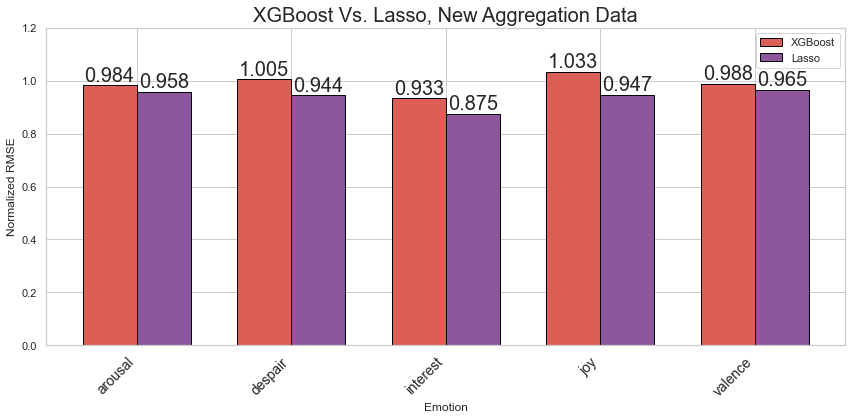

In [218]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rmse_side_by_side(df1, df2):
    # Merging the two dataframes on the 'emotion' column
    merged_df = pd.merge(df1, df2, on='emotion', suffixes=('_df1', '_df2'))
    
    # Setting up the figure size and bar width
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    emotions = merged_df['emotion']
    
    # Setting the positions of the bars on the x-axis
    index = np.arange(len(emotions))
    gold_palette = sns.color_palette("PRGn", n_colors=5)
    green_palette = sns.color_palette("hls")

    # Creating the side by side bar plot
    bars1 = plt.bar(index, merged_df['Normalized RMSE_df1'], bar_width, label='XGBoost', color=green_palette[0],edgecolor='black')
    bars2 = plt.bar(index + bar_width, merged_df['Normalized RMSE_df2'], bar_width, label='Lasso', color=gold_palette[0],edgecolor="black")
    
    # Adding labels and title
    plt.xlabel('Emotion')
    plt.ylabel('Normalized RMSE')
    plt.title('XGBoost Vs. Lasso, New Aggregation Data',size=20)
    plt.xticks(index + bar_width / 2, emotions, rotation=45, ha='right',size=14)
    plt.ylim([0,1.2])
    # Adding a legend
    plt.legend()
    
    # Adding data labels on top of the bars for better visibility
    def add_labels(bars):
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom',size=20)
    
    add_labels(bars1)
    add_labels(bars2)
    
    # Adjust layout for better fit
    plt.tight_layout()
    
    # Show plot
    plt.show()

# Example usage
# df1 and df2 are your dataframes
plot_rmse_side_by_side(xgboost_customdata_rmse, lasso_customdata_rmse)


In [221]:
df_cleaned = pd.read_excel(r"Y:\Data Science Readings\Applied Project Semester B\Compare_rmse_Itamar_And_Aggregate.xlsx")

In [225]:
df_cleaned

,Unnamed: 0,arousal,despair,interest,joy,valence
0,Lasso - original agg,0.992,0.932,0.877,0.931,0.954
1,XGBoost - original agg,0.957,0.960,0.919,0.981,0.980
2,Lasso - new agg,0.958,0.944,0.875,0.947,0.965
3,XGBoost - new agg,0.984,1.005,0.933,1.033,0.988


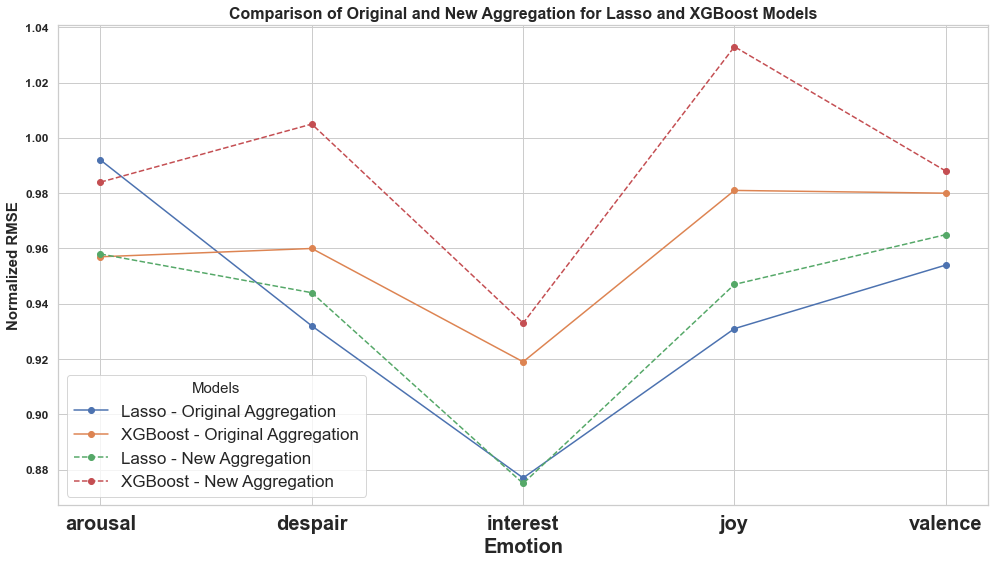

In [252]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataframe
data = {
    'Unnamed: 0': ['Lasso - original agg', 'XGBoost - original agg', 'Lasso - new agg', 'XGBoost - new agg'],
    'arousal': [0.992, 0.957, 0.958, 0.984],
    'despair': [0.932, 0.960, 0.944, 1.005],
    'interest': [0.877, 0.919, 0.875, 0.933],
    'joy': [0.931, 0.981, 0.947, 1.033],
    'valence': [0.954, 0.980, 0.965, 0.988]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set 'Unnamed: 0' as the index
df.set_index('Unnamed: 0', inplace=True)

# Separate the models for original and new aggregation
original_agg = df.loc[['Lasso - original agg', 'XGBoost - original agg']]
new_agg = df.loc[['Lasso - new agg', 'XGBoost - new agg']]

# Plot the comparison for each model and aggregation
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting original aggregation
ax.plot(original_agg.columns, original_agg.loc['Lasso - original agg'], label='Lasso - Original Aggregation', marker='o')
ax.plot(original_agg.columns, original_agg.loc['XGBoost - original agg'], label='XGBoost - Original Aggregation', marker='o')

# Plotting new aggregation
ax.plot(new_agg.columns, new_agg.loc['Lasso - new agg'], label='Lasso - New Aggregation', marker='o', linestyle='--')
ax.plot(new_agg.columns, new_agg.loc['XGBoost - new agg'], label='XGBoost - New Aggregation', marker='o', linestyle='--')

# Adding labels and title
ax.set_xlabel('Emotion')
ax.set_ylabel('Normalized RMSE')
ax.set_title('Comparison of Original and New Aggregation for Lasso and XGBoost Models')
ax.legend()

# Setting labels and title with bold and larger font sizes
ax.set_xlabel('Emotion', fontsize=20, fontweight='bold')
ax.set_ylabel('Normalized RMSE', fontsize=15, fontweight='bold')
ax.set_title('Comparison of Original and New Aggregation for Lasso and XGBoost Models', fontsize=16, fontweight='bold')

# Customizing legend
ax.legend(fontsize=17, title_fontsize='15', title='Models', frameon=True)

# Bold x and y ticks
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
# Show the plot
plt.tight_layout()
plt.show()
